In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [01:52<00:00, 7.74MB/s]
100% 2.04G/2.04G [01:52<00:00, 19.4MB/s]


In [ ]:
! unzip plantvillage-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e6938d9-1ab0-4728-993c-1069b66ce73b___UF.GRC_YLCV_Lab 02727_final_mas

In [ ]:
! kaggle datasets download vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:15<00:00, 22.4MB/s]
100% 2.70G/2.70G [02:15<00:00, 21.4MB/s]


In [ ]:
! unzip new-plant-diseases-dataset

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Flatten())


model.add(tf.keras.layers.Dense(units=1500,activation='relu'))

model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(units=38,activation='softmax'))




In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 161s 67ms/step - accuracy: 0.4029 - loss: 2.1329 - val_accuracy: 0.8143 - val_loss: 0.5787
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 195s 66ms/step - accuracy: 0.8364 - loss: 0.5161 - val_accuracy: 0.9058 - val_loss: 0.2898
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 144s 65ms/step - accuracy: 0.9040 - loss: 0.2927 - val_accuracy: 0.9427 - val_loss: 0.1810
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 195s 62ms/step - accuracy: 0.9341 - loss: 0.1979 - val_accuracy: 0.9400 - val_loss: 0.1794
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 62ms/step - accuracy: 0.9502 - loss: 0.1501 - val_accuracy: 0.9494 - val_loss: 0.1636
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 144s 65ms/step - accuracy: 0.9663 - loss: 0.1038 - val_accuracy: 0.9473 - val_loss: 0.1727
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 144s 65ms/step - accuracy: 0.9681 - loss: 0.0970 - val_accuracy: 0.9574 - val_loss: 0.1394
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 202s 65ms/step - accuracy: 

# Evaluating our model

In [ ]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 75s 34ms/step - accuracy: 0.9880 - loss: 0.0393
Training accuracy: 0.9888043403625488


In [ ]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9673 - loss: 0.1107
Validation accuracy: 0.965228796005249


In [ ]:
model.save('trained_plant_disease_model.keras')
# model.save('trained_plant_disease_model.h5')

In [ ]:
training_history.history

{'accuracy': [0.607496976852417,
  0.859691321849823,
  0.9130237102508545,
  0.9406927824020386,
  0.9546625018119812,
  0.9664983153343201,
  0.970623791217804,
  0.9749484062194824,
  0.978888988494873,
  0.9813500046730042],
 'loss': [1.3406097888946533,
  0.4411061704158783,
  0.2662900686264038,
  0.18006247282028198,
  0.13935111463069916,
  0.10367080569267273,
  0.08998928219079971,
  0.07358956336975098,
  0.06431397795677185,
  0.05590317025780678],
 'val_accuracy': [0.8143068552017212,
  0.9057591557502747,
  0.9426929354667664,
  0.939961314201355,
  0.9494081735610962,
  0.947302520275116,
  0.9574322700500488,
  0.9583997130393982,
  0.9565786719322205,
  0.965228796005249],
 'val_loss': [0.5787174105644226,
  0.28975075483322144,
  0.1810123324394226,
  0.17939983308315277,
  0.16363391280174255,
  0.17274966835975647,
  0.13938868045806885,
  0.1376752108335495,
  0.15210162103176117,
  0.12138938158750534]}

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


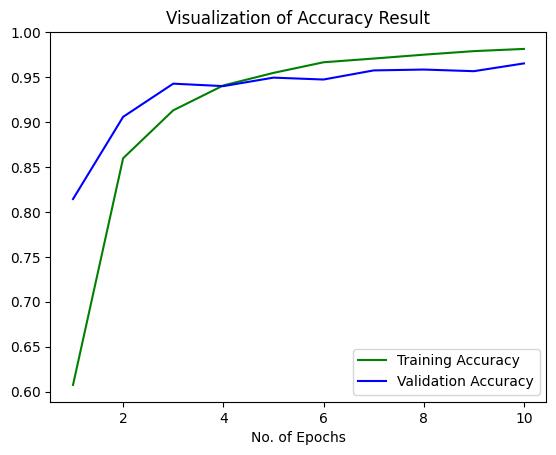

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='green',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Other Metrics fo model evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 30, 37, 37])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
class_name = validation_set.class_names
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.97      0.95       504
                                 Apple___Black_rot       0.97      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.91      1.00      0.95       440
                                   Apple___healthy       0.97      0.96      0.96       502
                               Blueberry___healthy       0.98      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.98      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.83      0.97      0.89       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.92      0.

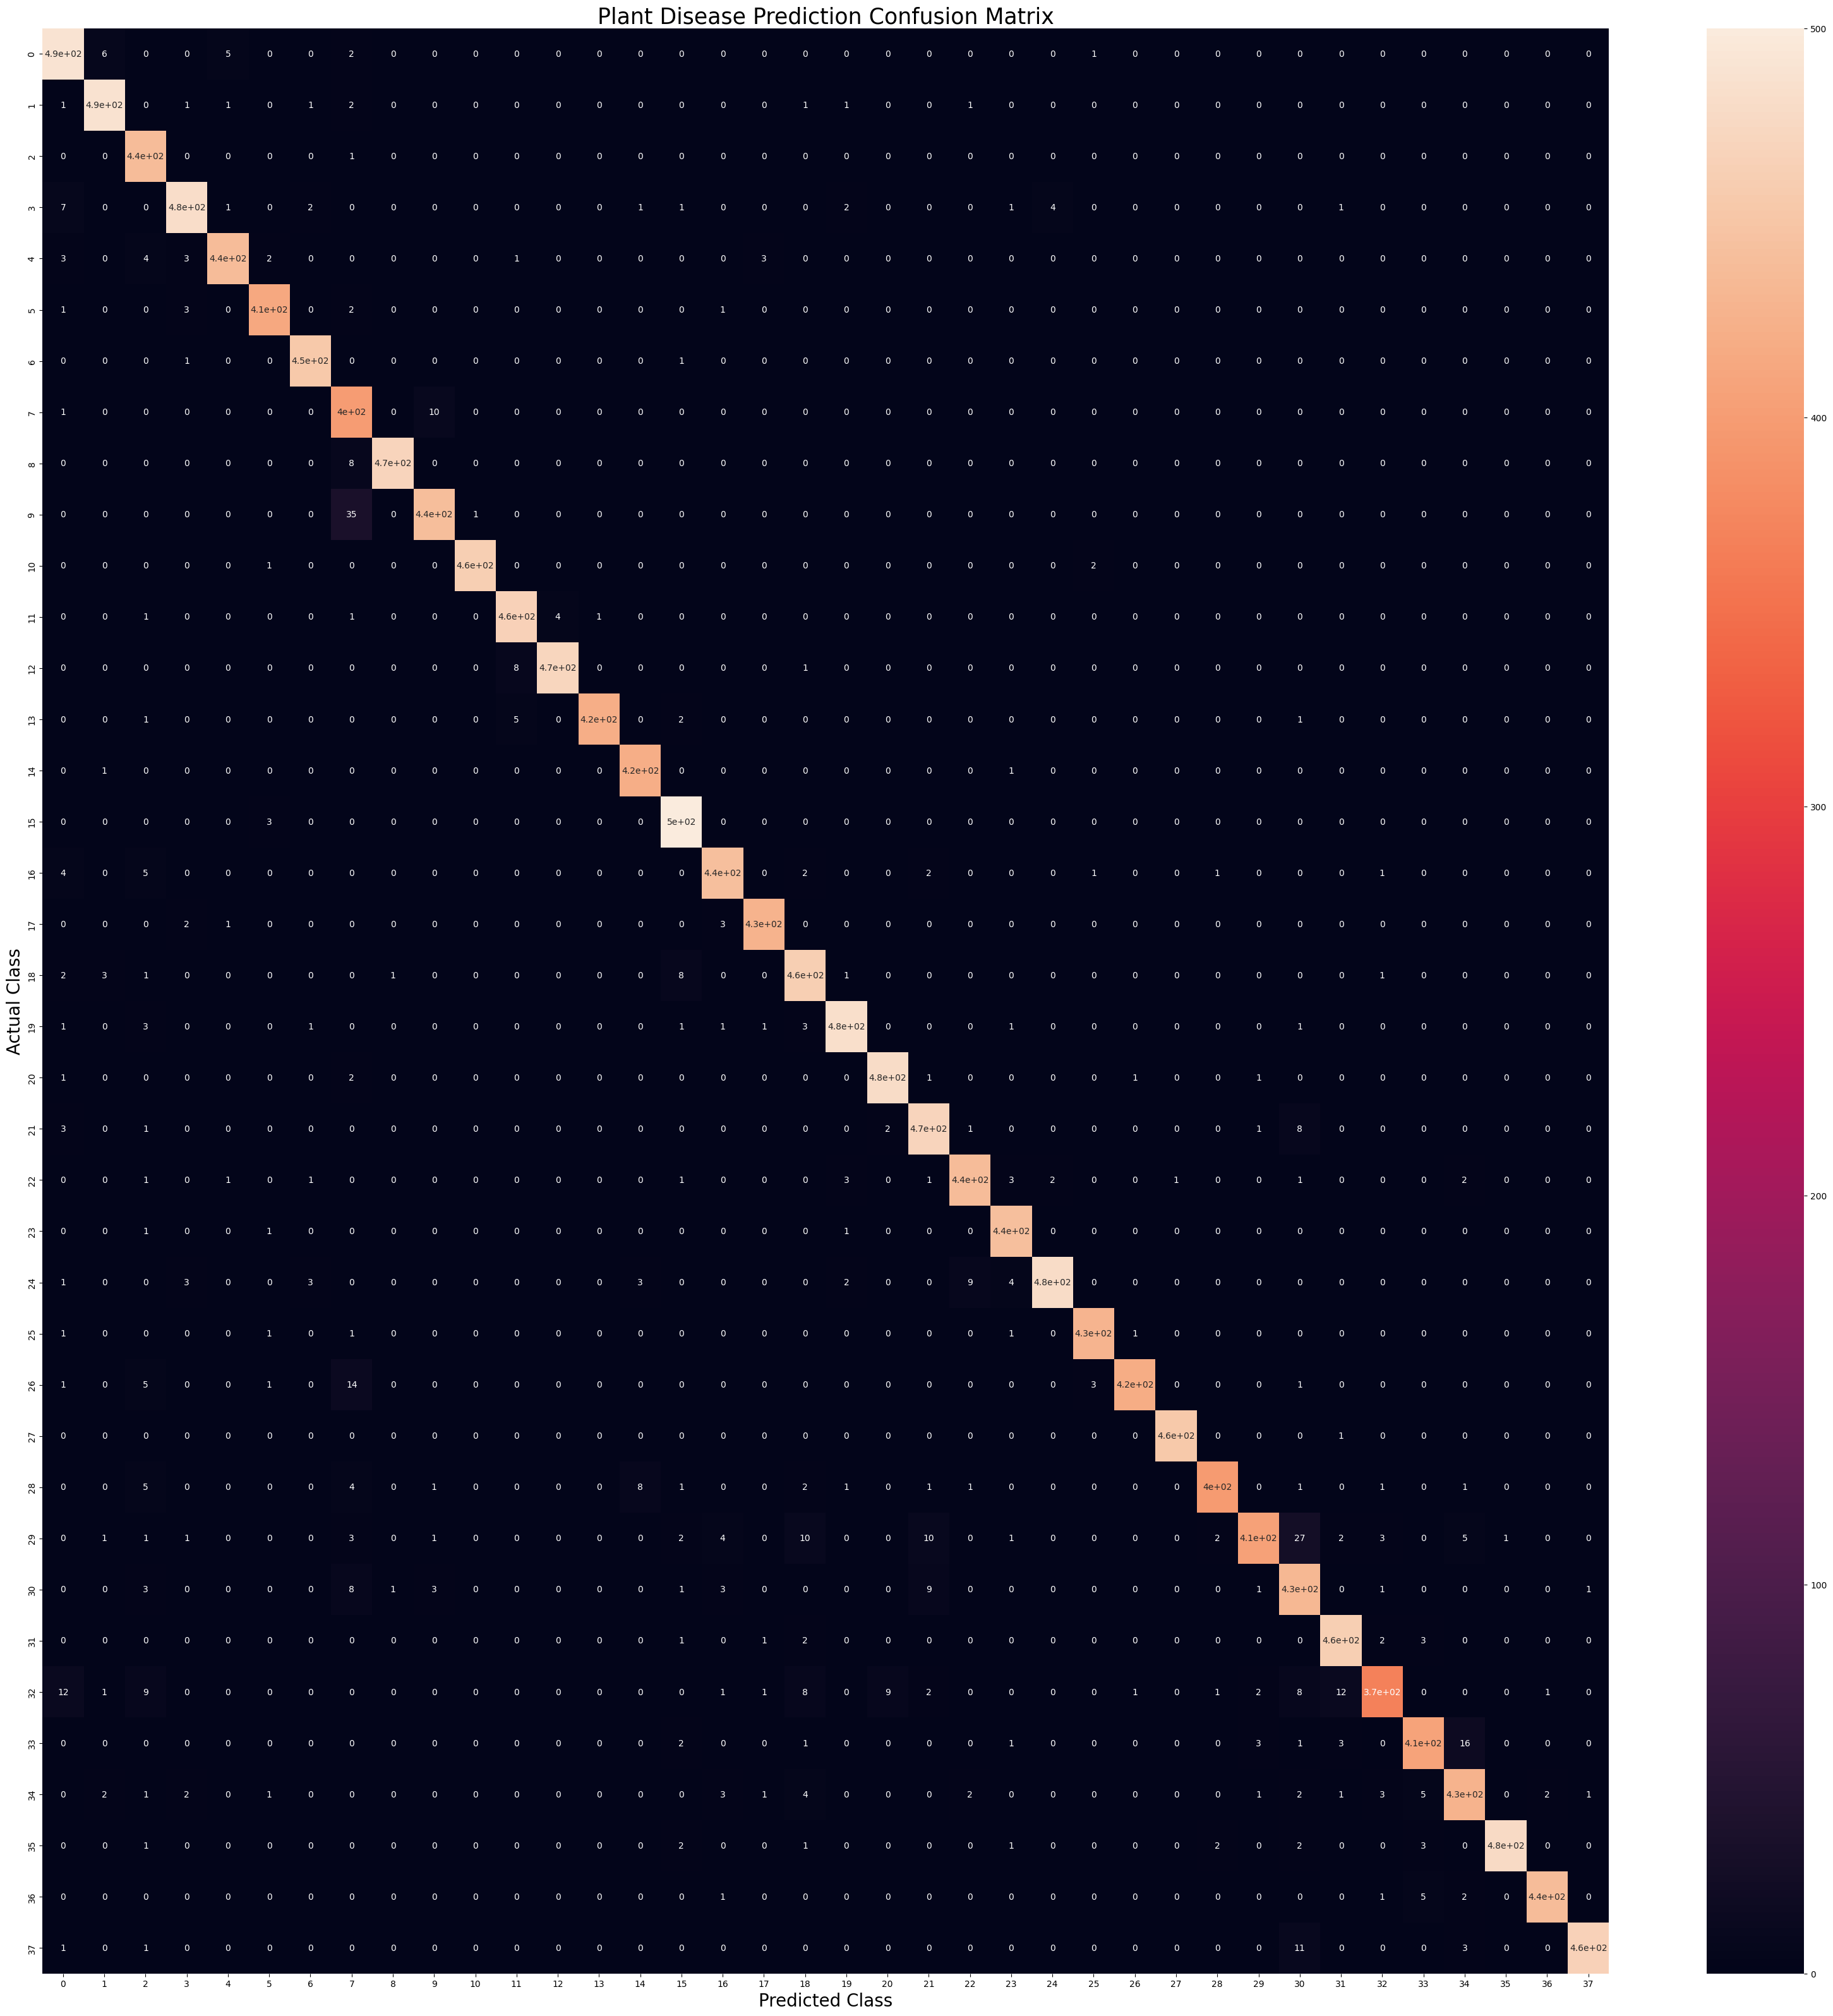

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

# Testing

In [ ]:
class_name = validation_set.class_names
print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
model = tf.keras.models.load_model('trained_plant_disease_model.keras')

# Visualising and Making Predictions on Single image

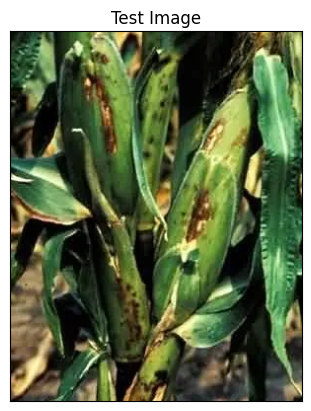

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/maize-2'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
import numpy as np
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [ ]:
print(predictions)

[[1.1761011e-08 5.5349396e-06 3.6899752e-09 6.6665232e-12 2.0267949e-11
  2.8272089e-07 7.7218321e-09 6.2886433e-04 3.9072964e-02 5.4569780e-09
  4.0614082e-11 1.7105531e-06 8.2646484e-06 7.0221978e-07 5.5097414e-13
  3.1431874e-11 1.2950302e-07 2.5771371e-10 3.4627575e-01 5.9844308e-07
  1.0121503e-05 5.6369297e-12 2.2478103e-10 1.1520505e-10 1.9303060e-12
  6.9281814e-10 5.6582380e-06 3.3784406e-13 1.9787212e-09 5.2042168e-01
  9.3552023e-02 1.9484167e-08 1.5610400e-05 5.5953062e-11 1.2409015e-07
  2.2208249e-11 1.5080881e-12 1.1995996e-08]]


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)



29


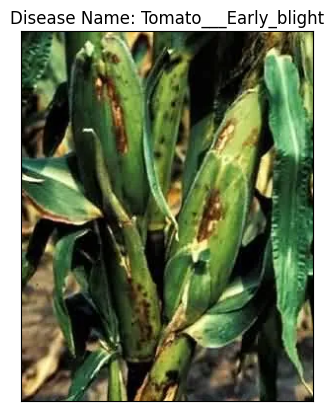

In [ ]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
print("/content/training_hist.json")

/content/training_hist.json
